In [1]:
import numpy as np
from random import randint, choice
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
states = 7
start_state = states//2
end_states = [0, states-1]
rewards = np.zeros(states)
rewards[states-1] = 1

In [3]:
# generates an episode that may be used by monte carlo
def generate_episode():
    s = start_state
    episode = []
    while s not in end_states:
        episode.append(s)
        move = choice([-1, 1])
        s = s + move
    returns = int(s==states-1)
    return episode, returns

# temporal difference simulation
def temporal_difference(values, alpha):
    s = start_state
    while s not in end_states: # Generating an episode for temporal difference
        move = choice([-1, 1])
        s = s + move
        values[s-move] = values[s-move] \
            + (alpha)*(rewards[s] + values[s] - values[s-move])
    
def monte_carlo(values, alpha):
    episode, returns = generate_episode()
    for state in episode:
        values[state] = values[state] + alpha * (returns - values[state])
    

In [16]:
def plot_1():
    episodes = [0, 1, 10, 100]
    values = np.zeros(states)
    values += 0.5
    values[states-1] -= 0.5 # setting terminal state to 0
    values[0] -= 0.5
    alpha = 0.1
    fig = plt.figure()
    num_episodes = 100
    for i in range(num_episodes):
        if i in episodes: # plot the current set of values
            plt.plot(values[1:states-1])
        temporal_difference(values, alpha)
    plt.plot(values[1:states-1])
    plt.plot([1/6, 2/6, 3/6, 4/5, 5/6]) # True values
    plt.xlabel("State")
    plt.ylabel("Value")
    plt.title("Estimated Value at each State")
    plt.legend(['0 Episodes', '1 Episode', '10 Episodes', '100 Episodes', 'True Values'])
    plt.show()
    
def plot_2():
    td_alphas = [.15, .1, .05]
    mc_alphas = [.01, .02, .03, .04]
    true_values = np.asarray([1/6, 2/6, 3/6, 4/6, 5/6])
    runs = 100
    num_episodes = 100
    
    rmses = np.zeros((len(td_alphas) + len(mc_alphas), num_episodes))
    for run in range(runs):
        
        values = np.zeros(((len(td_alphas) + len(mc_alphas), states)))
        for i in range(len(td_alphas) + len(mc_alphas)):
            for j in range(1, states-1):
                values[i, j] = 0.5 # Starting values are 0,5 except for terminal states

        
        for i in range(num_episodes):
            for j in range(len(td_alphas)):
                temporal_difference(values[j], td_alphas[j]) 
                errors = np.sqrt(np.power(values[j][1:states-1] - true_values, 2)) # index values to ignore terminal states
                rmses[j, i] += (1/(states-2)) * np.sum(errors) 
            for j in range(len(mc_alphas)):
                monte_carlo(values[j+len(td_alphas)], mc_alphas[j])
                errors = np.sqrt(np.power(values[j+len(td_alphas)][1:states-1] - true_values, 2))
                rmses[j+len(td_alphas), i] += (1/(states-2)) * np.sum(errors)
    rmses /= runs
    
    fig = plt.figure()
    for i in range(len(td_alphas)):
        plt.plot(rmses[i], label='TD: %.02f' % td_alphas[i])
    for i in range(len(mc_alphas)):
        plt.plot(rmses[i+len(td_alphas)], label='MC: %.02f' % mc_alphas[i])
    plt.xlabel('Walks / Episodes')
    plt.ylabel('Avg RMSE')
    plt.title("Empirical RMSE averaged over states")
    plt.legend()
    plt.show()

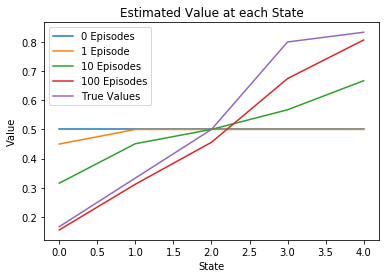

In [17]:
plot_1()

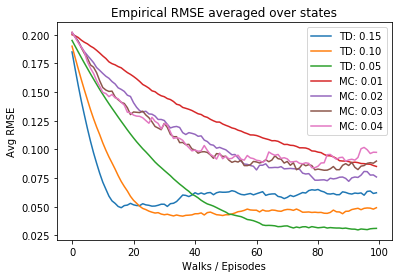

In [18]:
plot_2()